# BREAST CANCER PREDICTION SYSTEM

# This is a machine learning model to predict the succeptibility of patients to breast cancer given specific datapoints collected from them.

## Our goal is to create a system that can predict whether a patient has breast cancer or not. The system should have a high degree of accuracy  

### Import data analysis libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Set pandas to display all columns at maximum

In [67]:
pd.set_option('display.max_columns', None)

### Import accuracy metrics , spliting module and a scaler 

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score , accuracy_score

### Import machine learning algorithms 

#### This is a supervised learning classification problem 
1. SVC
2. DecisionTreeClassifier
3. KNeighborsClassifier
4. RandomForestClassifier
5. GradientBoostingClassifier
6. LogisticRegression

In [69]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#### Load the dataset from sklearn.datasets


In [70]:
import sklearn.datasets

In [71]:
sklearn_breast_cancer_data = sklearn.datasets.load_breast_cancer()

In [72]:
sklearn_breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### The above data is not presentable at all. we need to organize it into a dataframe 

In [73]:
breast_cancer_data = pd.DataFrame(sklearn_breast_cancer_data.data , columns = sklearn_breast_cancer_data.feature_names )

In [74]:
breast_cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [75]:
breast_cancer_data['HAS_CANCER'] = sklearn_breast_cancer_data.target

In [76]:
breast_cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,HAS_CANCER
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [77]:
list_of_column_features = list(sklearn_breast_cancer_data.feature_names)

In [78]:
list_of_column_features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

1.	mean radius   
2.	mean texture   
3.	mean perimeter   
4.	mean area   
5.	mean smoothness   
6.	mean compactness   
7.	mean concavity   
8.	mean concave points   
9.	mean symmetry   
10.	mean fractal dimension   
11.	radius error   
12.	texture error   
13.	perimeter error   
14.	area error   
15.	smoothness error   
16.	compactness error   
17.	concavity error   
18.	concave points error   
19.	symmetry error   
20.	fractal dimension error   
21.	worst radius   
22.	worst texture   
23.	worst perimeter   
24.	worst area   
25.	worst smoothness   
26.	worst compactness   
27.	worst concavity   
28.	worst concave points   
29.	worst symmetry   
30.	worst fractal dimension 



### Describe the data to get the descriptive statistics

In [79]:
breast_cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,HAS_CANCER
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Check whether there are empty rows and columns 

In [80]:
breast_cancer_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
HAS_CANCER                 0
dtype: int64

### Get the dataset's datatypes 

In [81]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### The relationship of datapoints with cancer

In [82]:
datapoints_relationship_with_cancer = breast_cancer_data.corr()
datapoints_relationship_with_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,HAS_CANCER
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


### Present the relationships in a heatmap 

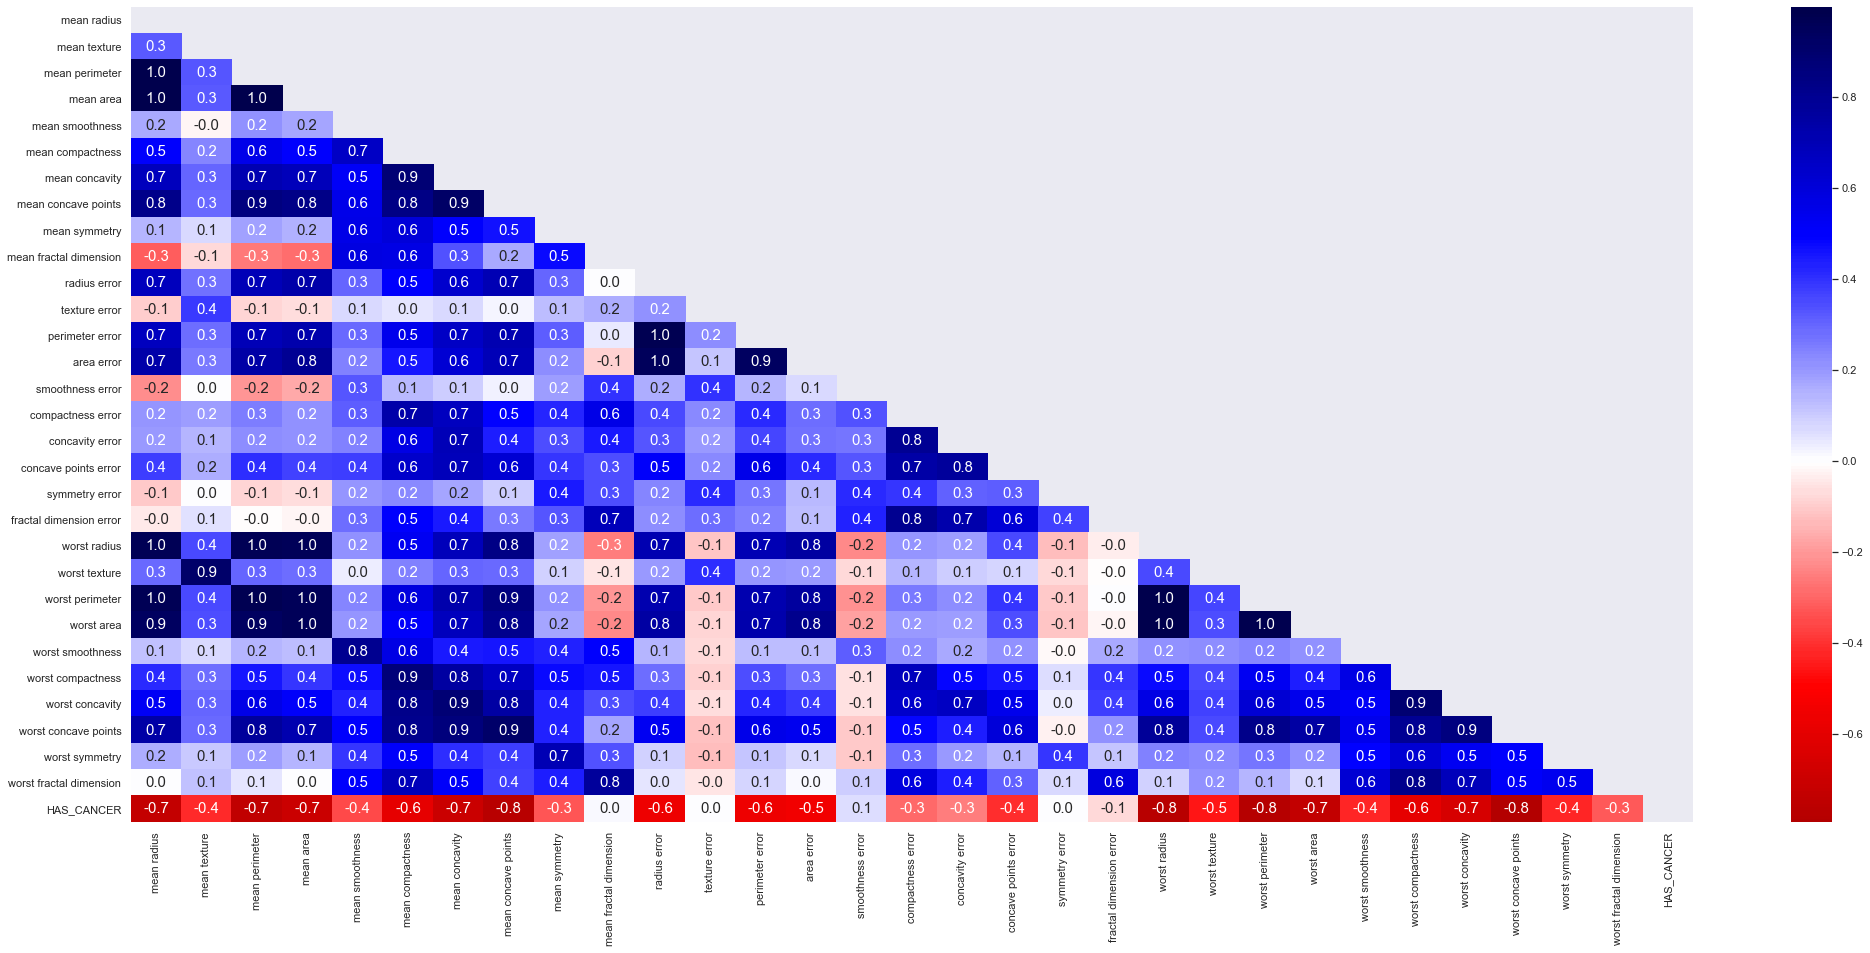

In [83]:
# show correlations using a heatmap
sns.set(rc={'figure.figsize':(35,15)})
mask = np.triu(np.ones_like(datapoints_relationship_with_cancer, dtype = bool))
ax = sns.heatmap(datapoints_relationship_with_cancer, fmt='.1f',mask=mask,center=0, annot=True, annot_kws={'size':15}, cmap='seismic_r')


# FEATURE SELECTION

## These features have a strong correlation with cancer. 
1.	mean radius   
2.	mean perimeter   
3.	mean area   
4.	mean compactness   
5.	mean concavity   
6.	mean concave points   
7.	radius error   
8.	perimeter error   
9.	area error   
10.	worst radius   
11.	worst texture   
12.	worst perimeter   
13.	worst area   
14.	worst compactness   
15.	worst concavity   
16.	worst concave points   


# Features with a weak correlation. These need to be droped from the dataframe

1.	mean texture
2.	mean smoothness
3.	mean symmetry
4.	mean fractal dimension
5.	texture error
6.	smoothness error
7.	compactness error
8.	concavity error
9.	concave points error
10.	symmetry error
11.	fractal dimension error
12.	worst smoothness
13.	worst symmetry
14.	worst fractal dimension


In [84]:
features_to_be_droped_from_the_dataset = 'mean texture','mean smoothness','mean symmetry','mean fractal dimension','texture error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error','worst smoothness','worst symmetry','worst fractal dimension'

In [85]:
breast_cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,HAS_CANCER
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [86]:
features_to_be_droped_from_the_dataset

('mean texture',
 'mean smoothness',
 'mean symmetry',
 'mean fractal dimension',
 'texture error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst smoothness',
 'worst symmetry',
 'worst fractal dimension')

In [87]:
c = list(features_to_be_droped_from_the_dataset)
c.append('HAS_CANCER')
breast_cancer_data[c].corr()

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst symmetry,worst fractal dimension,HAS_CANCER
mean texture,1.000000,-0.023389,0.071401,-0.076437,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.105008,0.119205,-0.415185
mean smoothness,-0.023389,1.000000,0.557775,0.584792,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.394309,0.499316,-0.358560
mean symmetry,0.071401,0.557775,1.000000,0.479921,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.699826,0.438413,-0.330499
mean fractal dimension,-0.076437,0.584792,0.479921,1.000000,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.334019,0.767297,0.012838
texture error,0.386358,0.068406,0.128053,0.164174,1.000000,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.128215,-0.045655,0.008303
smoothness error,0.006614,0.332375,0.187321,0.401964,0.397243,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,0.314457,-0.107342,0.101480,0.067016
compactness error,0.191975,0.318943,0.421659,0.559837,0.231700,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.227394,0.277878,0.590973,-0.292999
concavity error,0.143293,0.248396,0.342627,0.446630,0.194998,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.168481,0.197788,0.439329,-0.253730
concave points error,0.163851,0.380676,0.393298,0.341198,0.230283,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.215351,0.143116,0.310655,-0.408042
symmetry error,0.009127,0.200774,0.449137,0.345007,0.411621,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.012662,0.389402,0.078079,0.006522


In [88]:
breast_cancer_data[c]

,mean texture,mean smoothness,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst symmetry,worst fractal dimension,HAS_CANCER
0,10.38,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.4601,0.11890,0
1,17.77,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.2750,0.08902,0
2,21.25,0.10960,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.3613,0.08758,0
3,20.38,0.14250,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.6638,0.17300,0
4,14.34,0.10030,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.1726,0.05623,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.2060,0.07115,0
565,28.25,0.09780,0.1752,0.05533,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.2572,0.06637,0
566,28.08,0.08455,0.1590,0.05648,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.2218,0.07820,0
567,29.33,0.11780,0.2397,0.07016,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.4087,0.12400,0


In [89]:
X = breast_cancer_data.drop(columns = c , axis = 1)
Y = breast_cancer_data['HAS_CANCER']


In [90]:
X

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,17.33,184.60,2019.0,0.66560,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,39.42,184.60,1821.0,0.86810,0.9387,0.2650


In [91]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: HAS_CANCER, Length: 569, dtype: int32

### Split the data into train and test chunks

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5, stratify = Y)

In [93]:
X_train

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
508,16.300,104.70,819.8,0.06712,0.05526,0.04563,0.2067,1.146,20.67,17.32,17.76,109.80,928.2,0.13610,0.19470,0.13570
524,9.847,63.00,293.2,0.08419,0.02330,0.02416,0.2498,1.976,15.24,11.24,22.99,74.32,376.5,0.22430,0.08434,0.06528
161,19.190,126.30,1157.0,0.11850,0.11930,0.09667,1.0000,6.971,119.30,22.03,17.81,146.60,1495.0,0.20160,0.22640,0.17770
330,16.030,105.80,793.2,0.13710,0.12040,0.07041,0.3371,2.629,33.27,18.76,21.98,124.30,1070.0,0.44780,0.49560,0.19810
269,10.710,69.50,344.9,0.12890,0.08448,0.02867,0.3198,2.230,20.74,11.69,25.21,76.51,410.4,0.25500,0.25340,0.08600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,12.980,84.52,514.0,0.11250,0.07107,0.02950,0.2684,2.465,20.65,14.42,21.95,99.21,634.3,0.32530,0.34390,0.09858
429,12.720,80.98,501.3,0.04522,0.01402,0.01835,0.2954,2.109,23.24,13.82,20.96,88.87,586.8,0.09605,0.03469,0.03612
177,16.460,109.30,832.9,0.15560,0.17930,0.08866,0.3037,2.482,31.59,17.79,28.45,123.50,981.2,0.46670,0.58620,0.20350
500,15.040,98.73,689.4,0.13640,0.07721,0.06142,0.3720,2.304,34.84,16.76,20.43,109.70,856.9,0.21760,0.18560,0.10180


In [94]:
X_test

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
525,8.571,54.53,221.3,0.07632,0.025650,0.01510,0.1267,1.069,7.254,9.473,18.45,63.30,275.6,0.22350,0.17540,0.08512
221,13.560,88.59,561.3,0.11920,0.078600,0.04451,0.2569,2.011,21.030,14.980,17.13,101.10,686.6,0.26980,0.25770,0.09090
67,11.310,71.80,394.1,0.04701,0.037090,0.02230,0.2727,1.831,18.150,12.330,23.84,78.00,466.7,0.09148,0.14440,0.06961
350,11.660,73.70,421.0,0.03630,0.008306,0.01162,0.3534,2.225,26.030,13.280,19.74,83.61,542.5,0.06476,0.03046,0.04262
314,8.597,54.09,221.2,0.05847,0.000000,0.00000,0.3368,2.222,17.810,8.952,22.44,56.65,240.1,0.07767,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,12.200,78.01,457.9,0.06545,0.019940,0.01692,0.2575,1.959,19.010,13.750,21.38,91.11,583.1,0.19280,0.11670,0.05556
287,12.890,81.89,515.9,0.03729,0.022600,0.01171,0.1532,1.115,12.680,13.620,15.54,87.40,577.0,0.11470,0.11860,0.05366
273,9.742,61.50,289.9,0.04689,0.011030,0.01407,0.2684,1.750,16.390,10.750,20.88,68.09,355.2,0.09370,0.04043,0.05159
428,11.130,70.47,381.1,0.03834,0.013690,0.01370,0.1415,0.968,9.704,11.680,20.29,74.35,421.1,0.06219,0.04580,0.04044


# MODEL SELECTION


In [95]:
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(max_iter = 3000)
]

In [96]:
def compare_models_with_train_test_split():
    for model in models:
        model.fit(X_train, Y_train)
        training_prediction = model.predict(X_train)
        testing_prediction = model.predict(X_test)
        model_training_accuracy = accuracy_score(Y_train, training_prediction)
        model_testing_accuracy = accuracy_score(Y_test, testing_prediction)
        print('Training accuracy for ', model , 'is ---',model_training_accuracy )
        print('Testing accuracy for ', model , 'is ---', model_testing_accuracy)
        print('*****************************************************************g')

In [97]:
compare_models_with_train_test_split()

Training accuracy for  SVC() is --- 0.9164835164835164
Testing accuracy for  SVC() is --- 0.8771929824561403
*****************************************************************g
Training accuracy for  DecisionTreeClassifier() is --- 1.0
Testing accuracy for  DecisionTreeClassifier() is --- 0.9210526315789473
*****************************************************************g
Training accuracy for  KNeighborsClassifier() is --- 0.9406593406593406
Testing accuracy for  KNeighborsClassifier() is --- 0.9385964912280702
*****************************************************************g
Training accuracy for  RandomForestClassifier() is --- 1.0
Testing accuracy for  RandomForestClassifier() is --- 0.956140350877193
*****************************************************************g
Training accuracy for  GradientBoostingClassifier() is --- 1.0
Testing accuracy for  GradientBoostingClassifier() is --- 0.9649122807017544
*****************************************************************g
Training a

##### RandomForestClassifier , GradientBoostingClassifier  and LogisticRegression are performing well with train_test_split
#### Let's try with cross-validation

In [98]:
def compare_models_with_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, X, Y, cv = 13)
        mean_accuracy = sum(cv_score) / len(cv_score)
        mean_accuracy = mean_accuracy * 100
        mean_accuracy = round(mean_accuracy, 2)
        print('Accuracy of ', model , 'is ---', cv_score)
        print('Mean accuracy of ', model , 'is ---', mean_accuracy)
        print('****************************************************g')

In [99]:
compare_models_with_cross_validation()

Accuracy of  SVC() is --- [0.86363636 0.97727273 0.79545455 0.86363636 0.93181818 0.93181818
 0.93181818 0.93181818 0.95454545 0.97727273 0.88372093 0.95348837
 0.90697674]
Mean accuracy of  SVC() is --- 91.56
****************************************************g
Accuracy of  DecisionTreeClassifier() is --- [0.90909091 0.95454545 0.93181818 0.88636364 0.93181818 0.90909091
 0.93181818 0.93181818 0.93181818 0.97727273 0.93023256 0.97674419
 1.        ]
Mean accuracy of  DecisionTreeClassifier() is --- 93.86
****************************************************g
Accuracy of  KNeighborsClassifier() is --- [0.93181818 0.95454545 0.84090909 0.88636364 0.95454545 0.93181818
 0.95454545 0.93181818 0.95454545 0.97727273 0.8372093  0.95348837
 0.95348837]
Mean accuracy of  KNeighborsClassifier() is --- 92.79
****************************************************g
Accuracy of  RandomForestClassifier() is --- [0.95454545 0.97727273 0.84090909 0.90909091 0.95454545 0.95454545
 1.         0.97727273 0

### GradientBoostingClassifier is the best performing algorithm

In [100]:
production_model = GradientBoostingClassifier()

In [101]:
production_score = cross_val_score(production_model, X, Y, cv = 13)
production_model.fit(X_train, Y_train)

GradientBoostingClassifier()

# MODEL TESTING

In [102]:
input_data = [ 
    
     [12.340,78.94,468.5,0.06307,0.029580,0.02647,0.1166,0.7714,8.955,13.610,19.27,87.22,564.9,0.20740,0.17910,0.10700],
     [13.860,90.96,578.9,0.15170,0.099010,0.05602,0.2563,1.9330,22.690,15.750,26.93,104.40,750.1,0.43700,0.46360,0.16540],
     [17.270,112.40,928.8,0.1109,0.120400,0.05736,0.5100,3.2830,58.380,20.380,35.46,132.80,1284.0,0.41220,0.50360,0.17390],
     [11.930,76.14,442.7,0.05242,0.026060,0.01796,0.2522,1.6490,18.950,13.800,20.14,87.64,589.5,0.15750,0.15140,0.06876],
     [14.870,98.64,682.5,0.16490,0.169000,0.08923,0.4266,2.9890,41.180,18.810,27.37,127.10,1095.0,0.44800,0.47040,0.20270],
     [28.110,188.50,2499.0,0.15160,0.320100,0.15950,2.8730,21.9800,525.600,28.110,18.47,188.50,2499.0,0.15160,0.32010,0.15950],
    [ 13.000,82.61,520.2,0.05073,0.012060,0.01762,0.262,1.6570,21.190,14.340,31.88,91.06,628.5,0.10930,0.04462,0.05921],
    [ 14.950,96.85,678.1,0.1305,0.153900,0.08624,1.2960,8.4190,101.900,18.550,21.43,121.40,971.4,0.21640,0.33550,0.16670],
     [10.940,70.39,370.0,0.07460,0.049440,0.02932,0.3796,3.0180,25.780,12.400,25.58,82.76,472.4,0.16440,0.14120,0.07887],
    [ 12.780,81.37,502.5,0.05234,0.036530,0.02864,0.2368,1.4710,18.330,13.460,19.76,85.67,554.9,0.07061,0.10390,0.05882]
                     ]


In [103]:
def test_model():
    for data in input_data:
        input_data_as_numpy_array = np.asarray(data)
        reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)
        prediction = production_model.predict(reshaped_input_data)
        print(prediction)
        if prediction[0]==0:
            print('This patient is healthy')
        else:
            print('This patient has breast cancer')

In [104]:
test_model()

[1]
This patient has breast cancer
[0]
This patient is healthy
[0]
This patient is healthy
[1]
This patient has breast cancer
[0]
This patient is healthy
[0]
This patient is healthy
[1]
This patient has breast cancer
[0]
This patient is healthy
[1]
This patient has breast cancer
[1]
This patient has breast cancer


# 
1. 527 1           correct
2. 215  0          correct
3. 441  0           correct
4. 401  1            correct
5. 117  0            correct
6. 212  0          correct
7. 458 1           correct
8. 138 0           correct
9. 405 1             correct
10. 69 1                correct
 

In [65]:
breast_cancer_data.head(70)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,HAS_CANCER
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,0.06654,0.3577,1.2810,2.450,35.24,0.006703,0.023100,0.02315,0.011840,0.01900,0.003224,17.31,33.39,114.60,925.1,0.1648,0.34160,0.30240,0.16140,0.3321,0.08911,0
66,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,0.2351,2.0110,1.660,14.20,0.010520,0.017550,0.01714,0.009333,0.02279,0.004237,10.41,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211,1
67,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,0.2727,0.9429,1.831,18.15,0.009282,0.009216,0.02063,0.008965,0.02183,0.002146,12.33,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641,1
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.086060,0.30380,0.033220,0.04197,0.009559,10.31,22.65,65.50,324.7,0.1482,0.43650,1.25200,0.17500,0.4228,0.11750,1


In [54]:
X_test.head(20)

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
525,8.571,54.53,221.3,0.07632,0.025650,0.01510,0.1267,1.0690,7.254,9.473,18.45,63.30,275.6,0.22350,0.17540,0.08512
221,13.560,88.59,561.3,0.11920,0.078600,0.04451,0.2569,2.0110,21.030,14.980,17.13,101.10,686.6,0.26980,0.25770,0.09090
67,11.310,71.80,394.1,0.04701,0.037090,0.02230,0.2727,1.8310,18.150,12.330,23.84,78.00,466.7,0.09148,0.14440,0.06961
350,11.660,73.70,421.0,0.03630,0.008306,0.01162,0.3534,2.2250,26.030,13.280,19.74,83.61,542.5,0.06476,0.03046,0.04262
314,8.597,54.09,221.2,0.05847,0.000000,0.00000,0.3368,2.2220,17.810,8.952,22.44,56.65,240.1,0.07767,0.00000,0.00000
527,12.340,78.94,468.5,0.06307,0.029580,0.02647,0.1166,0.7714,8.955,13.610,19.27,87.22,564.9,0.20740,0.17910,0.10700
215,13.860,90.96,578.9,0.15170,0.099010,0.05602,0.2563,1.9330,22.690,15.750,26.93,104.40,750.1,0.43700,0.46360,0.16540
441,17.270,112.40,928.8,0.11090,0.120400,0.05736,0.5100,3.2830,58.380,20.380,35.46,132.80,1284.0,0.41220,0.50360,0.17390
401,11.930,76.14,442.7,0.05242,0.026060,0.01796,0.2522,1.6490,18.950,13.800,20.14,87.64,589.5,0.15750,0.15140,0.06876
117,14.870,98.64,682.5,0.16490,0.169000,0.08923,0.4266,2.9890,41.180,18.810,27.37,127.10,1095.0,0.44800,0.47040,0.20270


### The model is about 100% accurate

In [41]:
import pickle

In [42]:
filename = 'Breast_cancer_predictive_model.sav'

In [43]:
pickle.dump(production_model, open(filename , 'wb'))

In [107]:
breast_cancer_data.to_csv('breast_cancer_data')

In [108]:
X

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,17.33,184.60,2019.0,0.66560,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,39.42,184.60,1821.0,0.86810,0.9387,0.2650


In [109]:
X.to_csv('breast_cancer_selected_data')

In [110]:
Y.to_csv('breast_cancer_labels')